In [1]:
'''
good resources
scanpy workflow:
https://nbisweden.github.io/workshop-scRNAseq/exercises.html
seurat question on DE analysis between conditions:
https://github.com/satijalab/seurat/issues/2820
'''

import os, tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import scanpy as sc
import anndata as ad
rc('font', size=14)
rc('font', family='Arial')
# rc('font', serif='Times')
rc('pdf', fonttype=42)
# rc('text', usetex=True)

In [2]:
data_location = 'local'
data_location = 'server'

if data_location=='server':
    folder = os.path.join("Y:",os.sep,"Nicola_Gritti","analysis_code","scRNAseq_Gastruloids","new_codes",'results','integration','diff_expr')
elif data_location=='hdd':
    folder = os.path.join("F:",os.sep,"scrnaseq_gastruloids",'results','integration','diff_expr')
elif data_location == 'local':
    folder = os.path.join('C:',os.sep,'Users','nicol','OneDrive','Desktop','scrnaseq_gastruloids','results','integration','diff_expr')


In [3]:
adata_pluri = ad.read_csv(os.path.join(folder,'expression_markersDiff_epi_pluri.csv')).T
pluri_fate = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_pluri_obsMeta.csv'))
pluri_fate = pluri_fate.rename(columns={'celltype.general': 'celltype'})
pluri_fate = pluri_fate[['celltype','dataset']]
adata_pluri.obs = pluri_fate
pluri_genes = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_pluri_varMeta.csv'))
pluri_genes = pluri_genes.rename(columns={'Unnamed: 0': 'geneName'})
pluri_genes = pluri_genes[['geneName','avg_logFC','pijuan','anlas']]
pluri_genes.index = pluri_genes.geneName
adata_pluri.var = pluri_genes

adata_primed = ad.read_csv(os.path.join(folder,'expression_markersDiff_epi_primed.csv')).T
primed_fate = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_primed_obsMeta.csv'))
primed_fate = primed_fate.rename(columns={'celltype.general': 'celltype'})
primed_fate = primed_fate[['celltype','dataset']]
adata_primed.obs = primed_fate
primed_genes = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_primed_varMeta.csv'))
primed_genes = primed_genes.rename(columns={'Unnamed: 0': 'geneName'})
primed_genes = primed_genes[['geneName','avg_logFC','pijuan','anlas']]
primed_genes.index = primed_genes.geneName
adata_primed.var = primed_genes

adata_ediff = ad.read_csv(os.path.join(folder,'expression_markersDiff_epi_ediff.csv')).T
ediff_fate = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_ediff_obsMeta.csv'))
ediff_fate = ediff_fate.rename(columns={'celltype.general': 'celltype'})
ediff_fate = ediff_fate[['celltype','dataset']]
adata_ediff.obs = ediff_fate
ediff_genes = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_ediff_varMeta.csv'))
ediff_genes = ediff_genes.rename(columns={'Unnamed: 0': 'geneName'})
ediff_genes = ediff_genes[['geneName','avg_logFC','pijuan','anlas']]
ediff_genes.index = ediff_genes.geneName
adata_ediff.var = ediff_genes


c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1210: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'celltyp

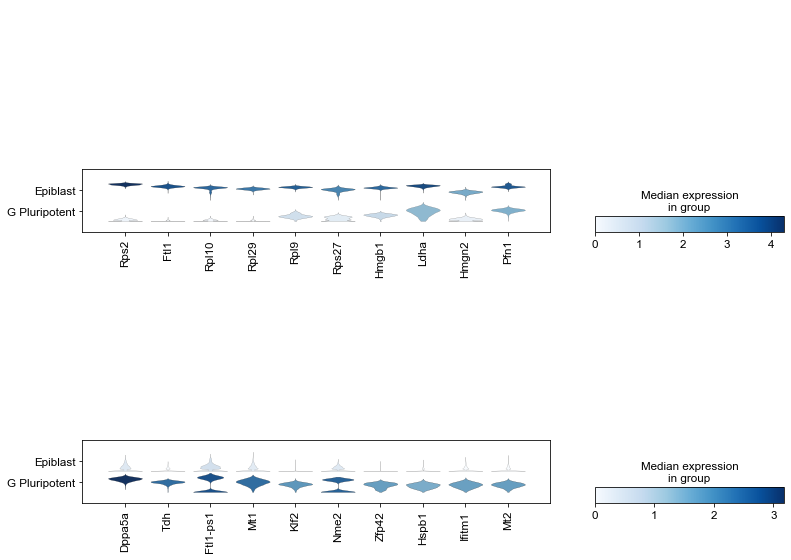

In [4]:
# 10 highest and lowest
epihigh = adata_pluri.var.nlargest(10,'avg_logFC').index
epilow = adata_pluri.var.nsmallest(10,'avg_logFC').index
adata_pluri1 = adata_pluri[:,epihigh]
adata_pluri2 = adata_pluri[:,epilow]

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
fig.subplots_adjust(left=0.25,top=0.99, bottom=0.3)
sc.pl.stacked_violin(adata_pluri1, list(adata_pluri1.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Pluripotent'],
                      ax=ax[0],
                      show=False
#                       title='Epiblast vs Pluripotent diff exp',
                    )
# fig.savefig(os.path.join(folder,'diffexp_epiHIGH_vs_pluri.pdf'))

# fig, ax = plt.subplots(figsize=(10,5))
# fig.subplots_adjust(top=0.99)
sc.pl.stacked_violin(adata_pluri2, list(adata_pluri2.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Pluripotent'],
                      ax=ax[1],
#                       title='Epiblast vs Pluripotent diff exp',
                    )
fig.savefig(os.path.join(folder,'diffexp_epi_vs_pluri.pdf'))

Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical


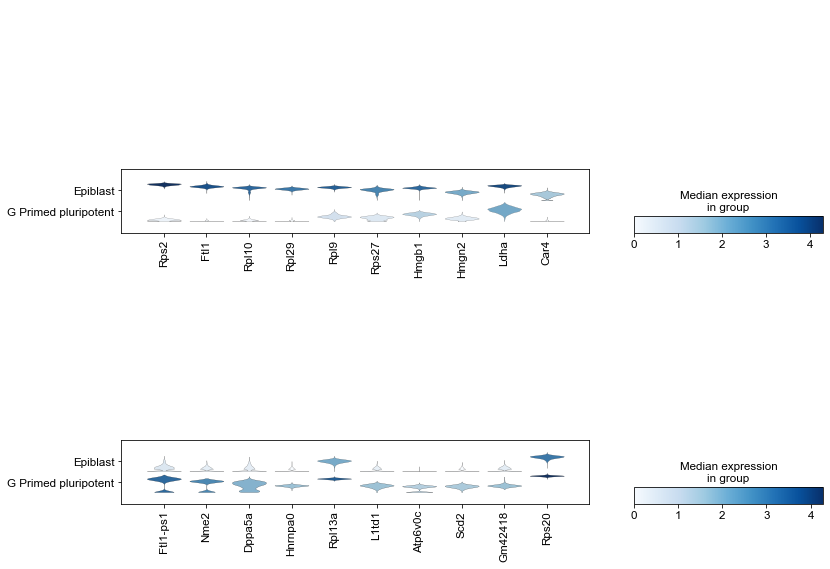

In [5]:
# 10 highest and lowest
epihigh = adata_primed.var.nlargest(10,'avg_logFC').index
epilow = adata_primed.var.nsmallest(10,'avg_logFC').index
adata1 = adata_primed[:,epihigh]
adata2 = adata_primed[:,epilow]

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
fig.subplots_adjust(left=0.25,top=0.99, bottom=0.3)
sc.pl.stacked_violin(adata1, list(adata1.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Primed pluripotent'],
                      ax=ax[0],
                     show=False
#                       title='Epiblast vs Pluripotent diff exp',
                    )
# fig.savefig(os.path.join(folder,'diffexp_epiHIGH_vs_pluri.pdf'))

# fig, ax = plt.subplots(figsize=(10,5))
# fig.subplots_adjust(top=0.99)
sc.pl.stacked_violin(adata2, list(adata2.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Primed pluripotent'],
                      ax=ax[1],
#                       title='Epiblast vs Pluripotent diff exp',
                    )
fig.savefig(os.path.join(folder,'diffexp_epi_vs_primed.pdf'))

Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical


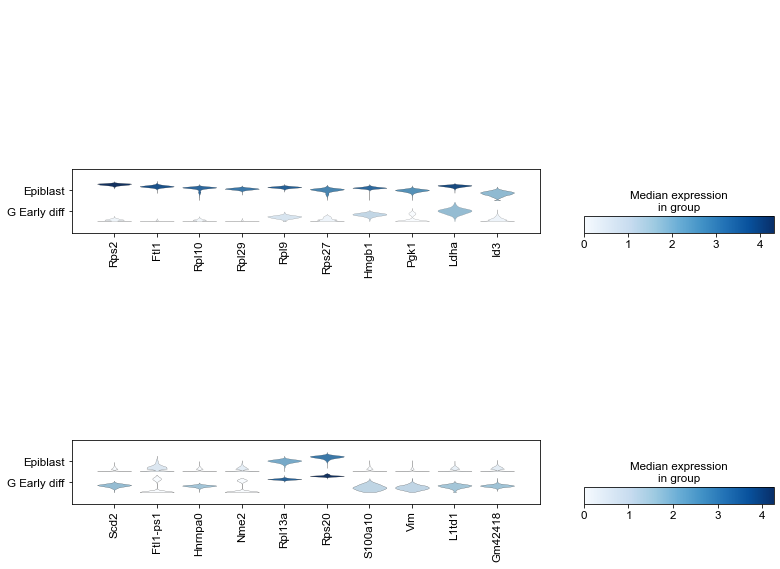

In [6]:
# 10 highest and lowest
epihigh = adata_ediff.var.nlargest(10,'avg_logFC').index
epilow = adata_ediff.var.nsmallest(10,'avg_logFC').index
adata1 = adata_ediff[:,epihigh]
adata2 = adata_ediff[:,epilow]

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
fig.subplots_adjust(left=0.25,top=0.99, bottom=0.3)
sc.pl.stacked_violin(adata1, list(adata1.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Early diff'],
                      ax=ax[0],
                     show=False
#                       title='Epiblast vs Pluripotent diff exp',
                    )
# fig.savefig(os.path.join(folder,'diffexp_epiHIGH_vs_pluri.pdf'))

# fig, ax = plt.subplots(figsize=(10,5))
# fig.subplots_adjust(top=0.99)
sc.pl.stacked_violin(adata2, list(adata2.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Early diff'],
                      ax=ax[1],
#                       title='Epiblast vs Pluripotent diff exp',
                    )
fig.savefig(os.path.join(folder,'diffexp_epi_vs_ediff.pdf'))

# Gene ontology

In [58]:
'''
From:
https://nbisweden.github.io/workshop-scRNAseq/labs/compiled/scanpy/scanpy_05_dge.html
'''

import gseapy
gene_set_names = gseapy.get_library_name(database='Mouse')
print(gene_set_names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'Cancer_Cell_Line_Encyclopedia', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease_Perturbations_from_GEO_up', 'Disease_Signatures_from_GEO_down_2014', 'Disease_Signatures_from_GEO_up_2014', 'DrugMatrix', 'Drug_Perturbations_from_GEO_2014', 'Drug_Perturbations_

In [69]:
thr = 1.

## Pluripotent

In [70]:
enr_res1 = gseapy.enrichr(gene_list=list(adata_pluri[:,adata_pluri.var.avg_logFC>thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epiHIGH_pluri.csv'))

c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [71]:
enr_res2 = gseapy.enrichr(gene_list=list(adata_pluri[:,adata_pluri.var.avg_logFC<-thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epi_pluriHIGH.csv'))

c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [72]:
gseapy.barplot(enr_res1.res2d,title='EpiblastHigh_vs_PluripotentLow',
              ofname=os.path.join(folder,'GO_epiHigh_vs_PluriLow.pdf'))
gseapy.barplot(enr_res2.res2d,title='EpiblastLow_vs_PluripotentHigh',
              ofname=os.path.join(folder,'GO_epiLow_vs_PluriHigh.pdf'))

## Primed pluripotent

In [73]:
enr_res1 = gseapy.enrichr(gene_list=list(adata_primed[:,adata_primed.var.avg_logFC>thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epiHIGH_primed.csv'))

c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [74]:
enr_res2 = gseapy.enrichr(gene_list=list(adata_primed[:,adata_primed.var.avg_logFC<-thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epi_primedHIGH.csv'))

c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [75]:
gseapy.barplot(enr_res1.res2d,title='EpiblastHigh_vs_PrimedLow',
              ofname=os.path.join(folder,'GO_epiHigh_vs_PrimedLow.pdf'))
gseapy.barplot(enr_res2.res2d,title='EpiblastLow_vs_PrimedHigh',
              ofname=os.path.join(folder,'GO_epiLow_vs_PrimedHigh.pdf'))


## Early diff

In [76]:
enr_res1 = gseapy.enrichr(gene_list=list(adata_ediff[:,adata_ediff.var.avg_logFC>thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epiHIGH_ediff.csv'))

c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [77]:
enr_res2 = gseapy.enrichr(gene_list=list(adata_ediff[:,adata_ediff.var.avg_logFC<-thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epi_ediffHIGH.csv'))

c:\users\nicol\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [78]:
gseapy.barplot(enr_res1.res2d,title='EpiblastHigh_vs_EdiffLow',
              ofname=os.path.join(folder,'GO_epiHigh_vs_EdiffLow.pdf'))
gseapy.barplot(enr_res2.res2d,title='EpiblastLow_vs_EdiffHigh',
              ofname=os.path.join(folder,'GO_epiLow_vs_EdiffHigh.pdf'))
